In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

from scipy import stats

## Modelo linear sem ruído e sem correlação

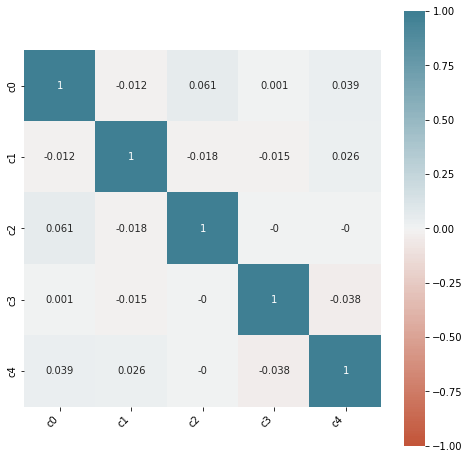

In [ ]:
X, y = make_regression(n_samples=1000, n_features=5, random_state=42)
X = pd.DataFrame(X)

X.columns = [f'c{i}' for i in X.columns]
y = 100 + X['c0'] + 2*X['c1'] + 3*X['c2'] + 4*X['c3'] + 5*X['c4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


correl = X_train.corr()
correl = round(correl,3)

fig, ax = plt.subplots(figsize = (8,8))

ax = sns.heatmap(
    correl, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200,),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.184e+30
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:07:26   Log-Likelihood:                 23451.
No. Observations:                 800   AIC:                        -4.689e+04
Df Residuals:                     794   BIC:                        -4.686e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0000    1.6e-15   6.26e+16      0.0

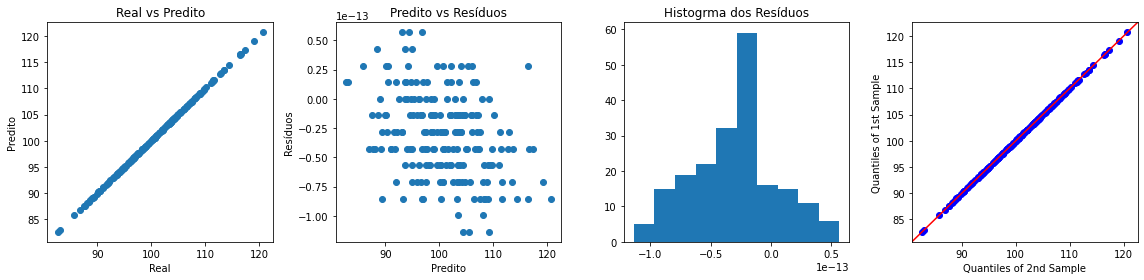

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

X3 = sm.add_constant(X_test)
predi = est2.predict(X3)

print(est2.summary())

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (16,4))

ax1.scatter(y_test,predi)
ax1.set_title('Real vs Predito')
ax1.set_xlabel('Real')
ax1.set_ylabel('Predito')

residuos = predi - y_test

ax2.scatter(predi,residuos)
ax2.set_title('Predito vs Resíduos')
ax2.set_xlabel('Predito')
ax2.set_ylabel('Resíduos')

ax3.hist(residuos)
ax3.set_title('Histogrma dos Resíduos')

qqplot_2samples(y_test,predi, line = '45',ax = ax4)

fig.tight_layout()

## Modelo linear sem ruído e com correlação

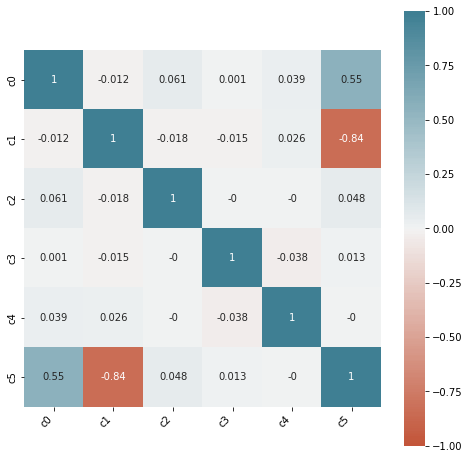

In [ ]:
X, y = make_regression(n_samples=1000, n_features=5, random_state=42)
X = pd.DataFrame(X)

X.columns = [f'c{i}' for i in X.columns]
X['c5'] = 2 * X['c0'] - 3*X['c1']

y = 100 + X['c0'] + 2*X['c1'] + 3*X['c2'] + 4*X['c3'] + 5*X['c4'] + 6*X['c5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


correl = X_train.corr()
correl = round(correl,3)

fig, ax = plt.subplots(figsize = (8,8))

ax = sns.heatmap(
    correl, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200,),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.184e+30
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:09:43   Log-Likelihood:                 23451.
No. Observations:                 800   AIC:                        -4.689e+04
Df Residuals:                     794   BIC:                        -4.686e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0000    1.6e-15   6.26e+16      0.0

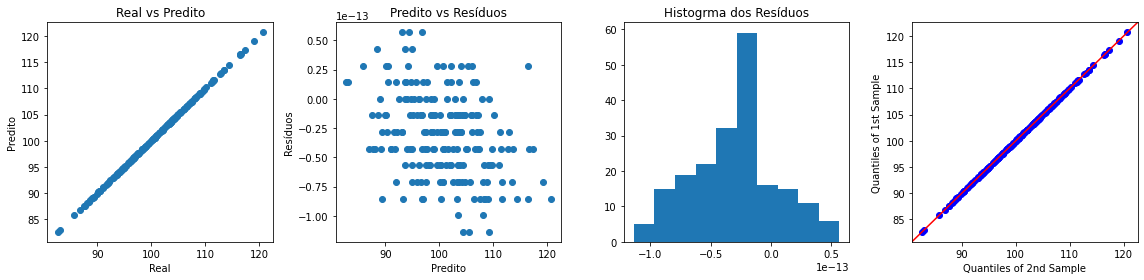

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

X3 = sm.add_constant(X_test)
predi = est2.predict(X3)

print(est2.summary())

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (16,4))

ax1.scatter(y_test,predi)
ax1.set_title('Real vs Predito')
ax1.set_xlabel('Real')
ax1.set_ylabel('Predito')

residuos = predi - y_test

ax2.scatter(predi,residuos)
ax2.set_title('Predito vs Resíduos')
ax2.set_xlabel('Predito')
ax2.set_ylabel('Resíduos')

ax3.hist(residuos)
ax3.set_title('Histogrma dos Resíduos')

qqplot_2samples(y_test,predi, line = '45',ax = ax4)

fig.tight_layout()

## Modelo linear com ruído e sem correlação

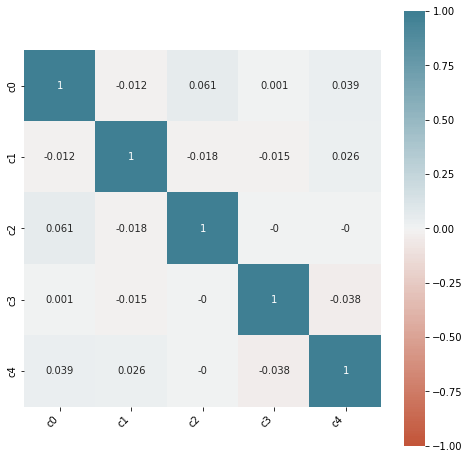

In [ ]:
X, y = make_regression(n_samples=1000, n_features=5, random_state=42)
X = pd.DataFrame(X)

X.columns = [f'c{i}' for i in X.columns]

y = 100 + X['c0'] + 2*X['c1'] + 3*X['c2'] + 4*X['c3'] + 5*X['c4'] 

noise = np.random.normal(0,10,1000)

y = y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

correl = X_train.corr()
correl = round(correl,3)

fig, ax = plt.subplots(figsize = (8,8))

ax = sns.heatmap(
    correl, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200,),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     92.17
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.64e-76
Time:                        14:10:24   Log-Likelihood:                -2957.5
No. Observations:                 800   AIC:                             5927.
Df Residuals:                     794   BIC:                             5955.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.5530      0.346    290.268      0.0

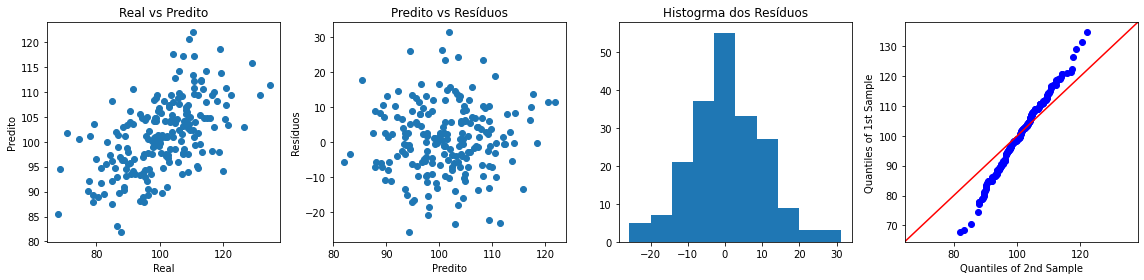

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

X3 = sm.add_constant(X_test)
predi = est2.predict(X3)

print(est2.summary())

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (16,4))

ax1.scatter(y_test,predi)
ax1.set_title('Real vs Predito')
ax1.set_xlabel('Real')
ax1.set_ylabel('Predito')

residuos = predi - y_test

ax2.scatter(predi,residuos)
ax2.set_title('Predito vs Resíduos')
ax2.set_xlabel('Predito')
ax2.set_ylabel('Resíduos')

ax3.hist(residuos)
ax3.set_title('Histogrma dos Resíduos')

qqplot_2samples(y_test,predi, line = '45',ax = ax4)

fig.tight_layout()

## Modelo linear com ruído e com correlação

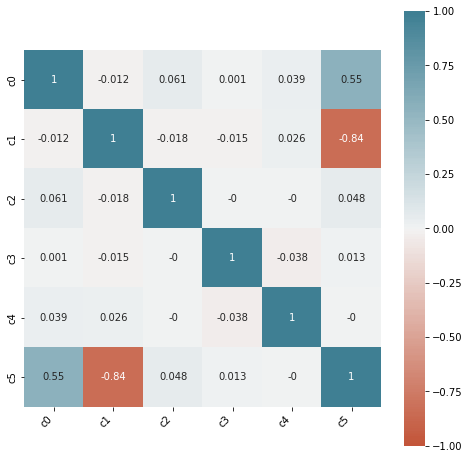

In [ ]:
X, y = make_regression(n_samples=1000, n_features=5, random_state=42)
X = pd.DataFrame(X)

X.columns = [f'c{i}' for i in X.columns]
X['c5'] = 2 * X['c0'] - 3*X['c1']

y = 100 + X['c0'] + 2*X['c1'] + 3*X['c2'] + 4*X['c3'] + 5*X['c4'] + 6*X['c5']

noise = np.random.normal(0,10,1000)

y = y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

correl = X_train.corr()
correl = round(correl,3)

fig, ax = plt.subplots(figsize = (8,8))

ax = sns.heatmap(
    correl, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200,),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     782.7
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          6.16e-304
Time:                        14:11:07   Log-Likelihood:                -2980.3
No. Observations:                 800   AIC:                             5973.
Df Residuals:                     794   BIC:                             6001.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.5784      0.356    279.386      0.0

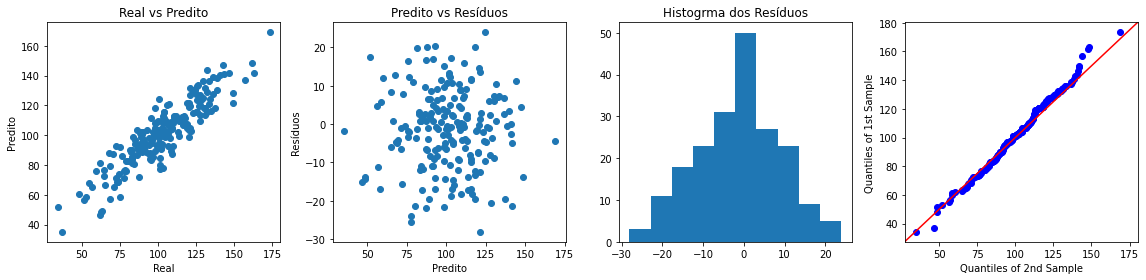

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

X3 = sm.add_constant(X_test)
predi = est2.predict(X3)

print(est2.summary())

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (16,4))

ax1.scatter(y_test,predi)
ax1.set_title('Real vs Predito')
ax1.set_xlabel('Real')
ax1.set_ylabel('Predito')

residuos = predi - y_test

ax2.scatter(predi,residuos)
ax2.set_title('Predito vs Resíduos')
ax2.set_xlabel('Predito')
ax2.set_ylabel('Resíduos')

ax3.hist(residuos)
ax3.set_title('Histogrma dos Resíduos')

qqplot_2samples(y_test,predi, line = '45',ax = ax4)

fig.tight_layout()